In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('E:/COADING/MachineLearning/DataSet/ushape.csv', names=['X', 'Y', 'Class'])
df

,X,Y,Class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
95,1.699453,0.587720,1.0
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0


In [9]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values


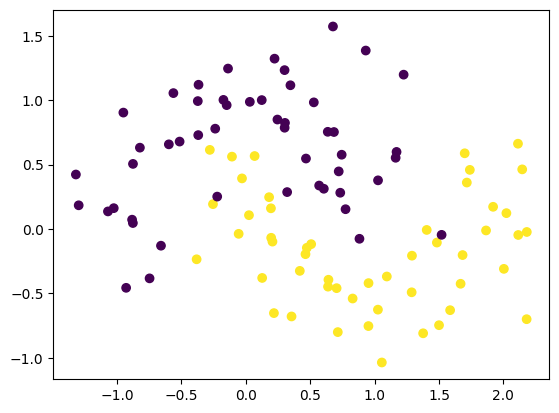

In [11]:
plt.scatter(X[:,0], X[:,1], c=y)

# Aplying LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression

In [15]:
lor = LogisticRegression()
lor.fit(X, y)

LogisticRegression()

In [16]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

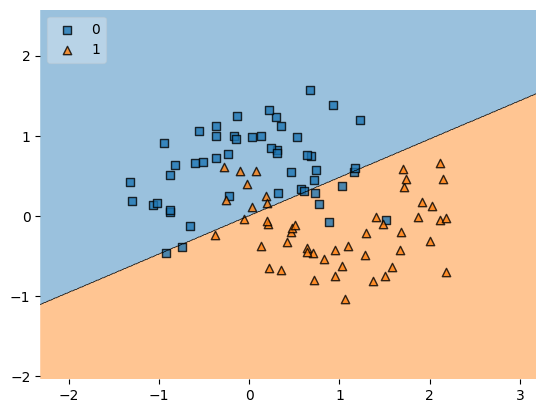

In [18]:
plot_decision_regions(X, y.astype('int'), lor, legend=2)

# Applying Polynomial LogisticRegression

In [21]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lor, X, y, scoring='accuracy', cv=10))

0.8300000000000001

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
poly = PolynomialFeatures(degree=3, include_bias=False)
# poly.fit(X, y)
X_trans = poly.fit_transform(X)

In [28]:
lor1 = LogisticRegression()
np.mean(cross_val_score(lor1,X_trans,y,scoring='accuracy',cv=10))

0.9

In [29]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

## Plotting

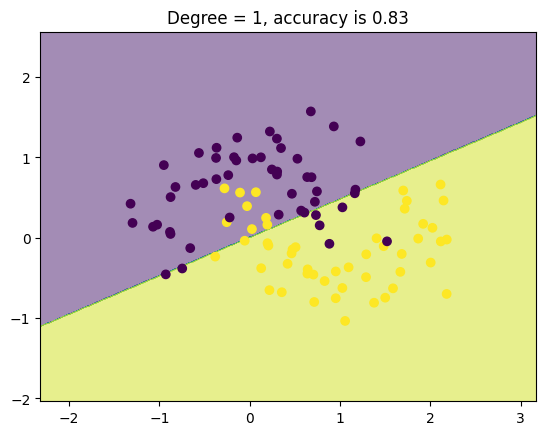

In [30]:
plot_decision_boundary(X,y)

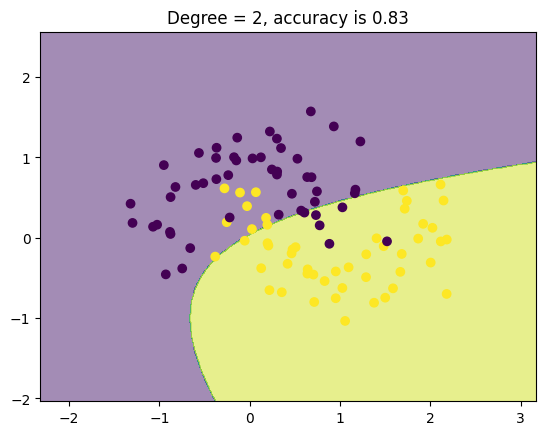

In [31]:
plot_decision_boundary(X,y,degree=2)

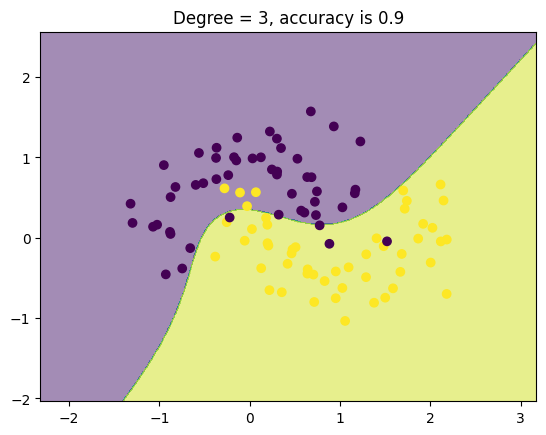

In [32]:
plot_decision_boundary(X,y,degree=3)

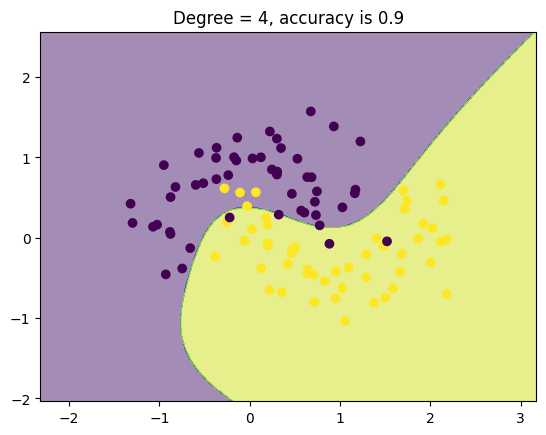

In [33]:
plot_decision_boundary(X,y,degree=4)

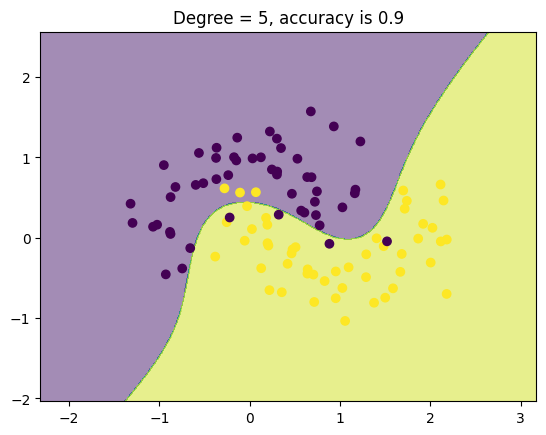

In [34]:
plot_decision_boundary(X,y,degree=5)

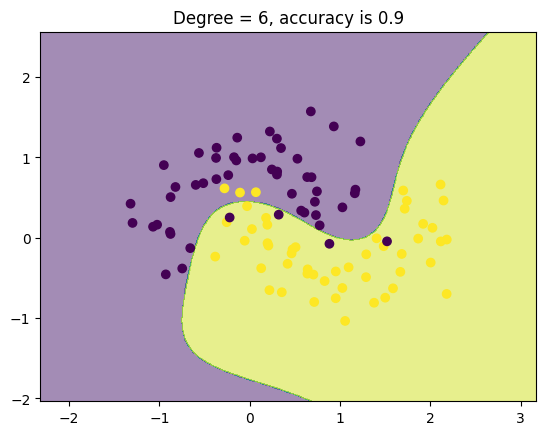

In [35]:
plot_decision_boundary(X,y,degree=6)

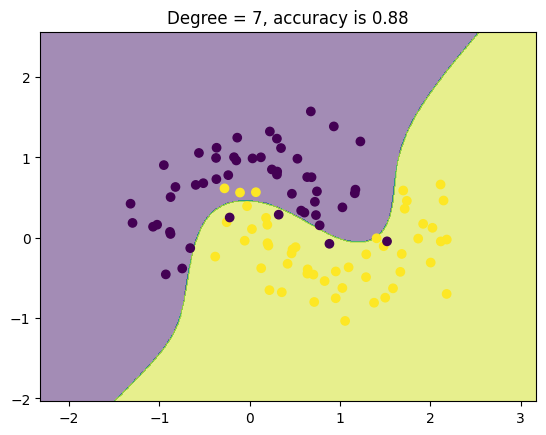

In [36]:
plot_decision_boundary(X,y,degree=7)

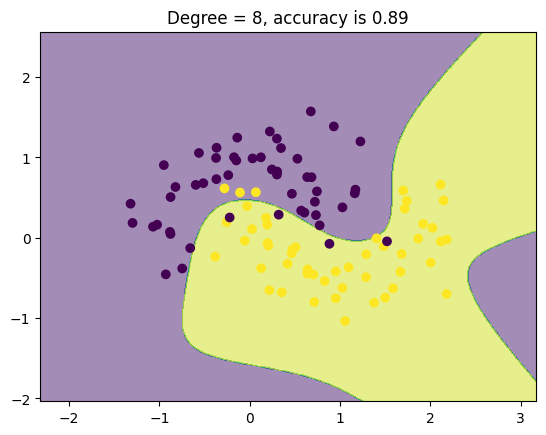

In [39]:
plot_decision_boundary(X,y,degree=8)
